In [63]:
from datetime import date

import pandas as pd
import numpy as np

from matplotlib.pylab import plt

import seaborn as sns

sns.set_style("white")

sns.set_context("poster")
dpi = 200
figsize=(15, 8)


%matplotlib inline

In [64]:
ireland_dataset = '../data/raw/ireland_stats_manual.csv'

In [65]:
df = pd.read_csv(ireland_dataset, parse_dates=['date'], dayfirst=True)
df['day_of_month'] = df['date'].map(lambda d: d.day)
df.shape, df.dtypes

((19, 37), date                           datetime64[ns]
 cases                                   int64
 hospitalise                           float64
 icu                                   float64
 deaths                                  int64
 cfr                                   float64
 healthcare                            float64
 clusters                              float64
 median_age                            float64
 male                                  float64
 female                                float64
 gender_unknown                        float64
 cases_under_1                         float64
 cases_1_to_4                          float64
 cases_under_5                         float64
 cases_5_to_14                         float64
 cases_15_to_24                        float64
 cases_25_to_34                        float64
 cases_35_to_44                        float64
 cases_45_to_54                        float64
 cases_55_to_64                        float64
 ca

In [66]:
df

,date,cases,hospitalise,icu,deaths,cfr,healthcare,clusters,median_age,male,...,hospitalised_35_to_44,hospitalised_45_to_54,hospitalised_55_to_64,hospitalised_65+,hospitalised_unknown,community_transmission,confirmed_case_transmission,travel_transmission,unknown_transmission,day_of_month
0,2020-03-16,271,84.0,6.0,2,2.0,59.0,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,84.0,60.00,45.00,113.00,53.00,16
1,2020-03-17,350,108.0,7.0,2,NaN,84.0,26.0,43.0,NaN,...,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN,17
2,2020-03-18,438,140.0,12.0,3,NaN,114.0,27.0,44.0,241.0,...,15.0,11.0,23.0,31.0,32.0,40.00,21.00,39.00,96.00,18
3,2020-03-19,584,173.0,13.0,3,0.5,147.0,29.0,44.0,257.0,...,18.0,28.0,31.0,60.0,0.0,179.00,97.00,148.00,160.00,19
4,2020-03-20,712,211.0,17.0,4,0.6,169.0,35.0,44.0,393.0,...,22.0,40.0,34.0,71.0,0.0,0.44,0.23,0.33,258.00,20
5,2020-03-21,836,239.0,25.0,6,0.7,208.0,37.0,44.0,460.0,...,26.0,42.0,37.0,85.0,0.0,0.43,0.24,0.33,NaN,21
6,2020-03-22,965,277.0,36.0,6,0.6,247.0,44.0,45.0,534.0,...,26.0,52.0,43.0,101.0,0.0,0.45,0.24,0.31,NaN,22
7,2020-03-23,1146,305.0,39.0,7,0.6,283.0,63.0,45.0,624.0,...,27.0,57.0,50.0,114.0,0.0,0.29,0.15,0.18,0.38,23
8,2020-03-24,1383,340.0,47.0,9,0.9,321.0,66.0,46.0,753.0,...,29.0,64.0,56.0,133.0,0.0,0.28,0.13,0.16,0.42,24
9,2020-03-25,1639,419.0,59.0,24,1.3,375.0,79.0,46.0,879.0,...,40.0,70.0,71.0,169.0,1.0,307.00,3.00,0.15,0.55,25


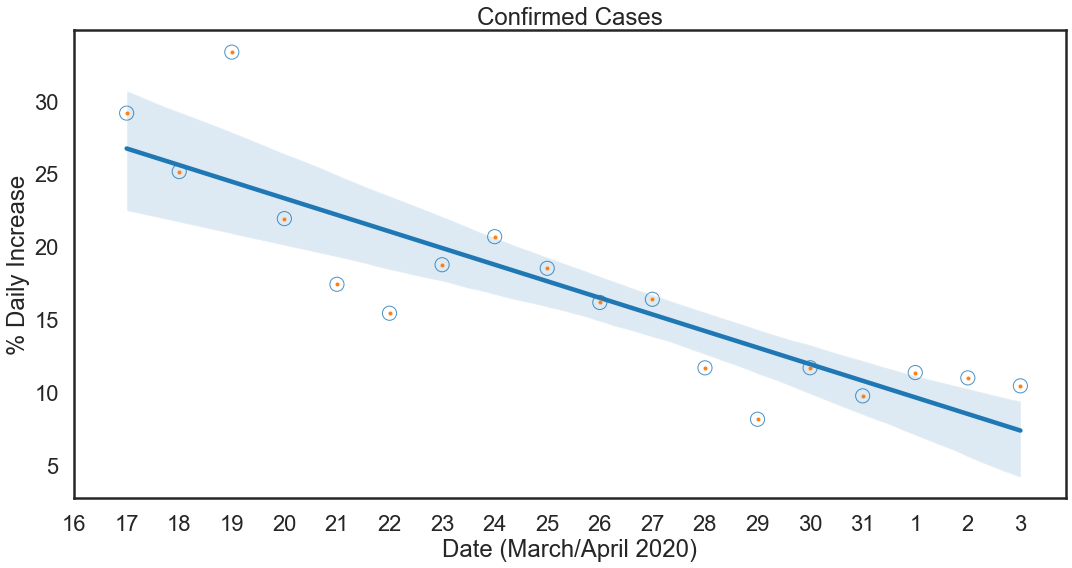

In [67]:
fig, ax = plt.subplots(figsize=figsize)

pct_change_cases = df['cases'].dropna().pct_change()*100

sns.regplot(
    pct_change_cases.index.values, pct_change_cases, ax=ax,
    truncate=True,
    scatter_kws=dict(marker='o', s=200, facecolors='none')
)

pct_change_cases.plot(ax=ax, marker='o', markersize=3, lw=0)


ax.set_title('Confirmed Cases')
ax.set_xlabel('Date (March/April 2020)')
ax.set_ylabel('% Daily Increase')

ax.set_xticks(range(len(pct_change_cases)))
ax.set_xticklabels(df['day_of_month'])

fig.tight_layout()


In [68]:
fig.savefig('../graphs/pct_daily_increase_cases_for_ireland.png', format='png', dpi=dpi)

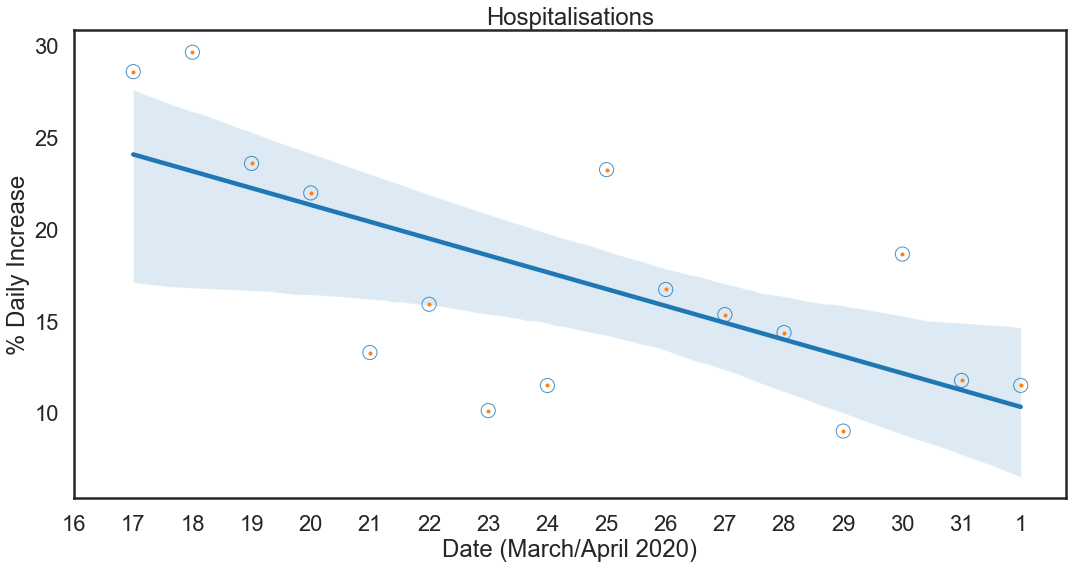

In [69]:
fig, ax = plt.subplots(figsize=figsize)

pct_change_hospital = df['hospitalise'].dropna().pct_change()*100

sns.regplot(
    pct_change_hospital.index.values, pct_change_hospital, ax=ax,
    truncate=True,
    scatter_kws=dict(marker='o', s=200, facecolors='none')
)

pct_change_hospital.plot(ax=ax, marker='o', markersize=3, lw=0)

ax.set_title('Hospitalisations')
ax.set_xlabel('Date (March/April 2020)')
ax.set_ylabel('% Daily Increase')

ax.set_xticks(range(len(pct_change_hospital)))
ax.set_xticklabels(df['day_of_month'])


fig.tight_layout()

In [70]:
fig.savefig('../graphs/pct_daily_increase_hospital_for_ireland.png', format='png', dpi=dpi)

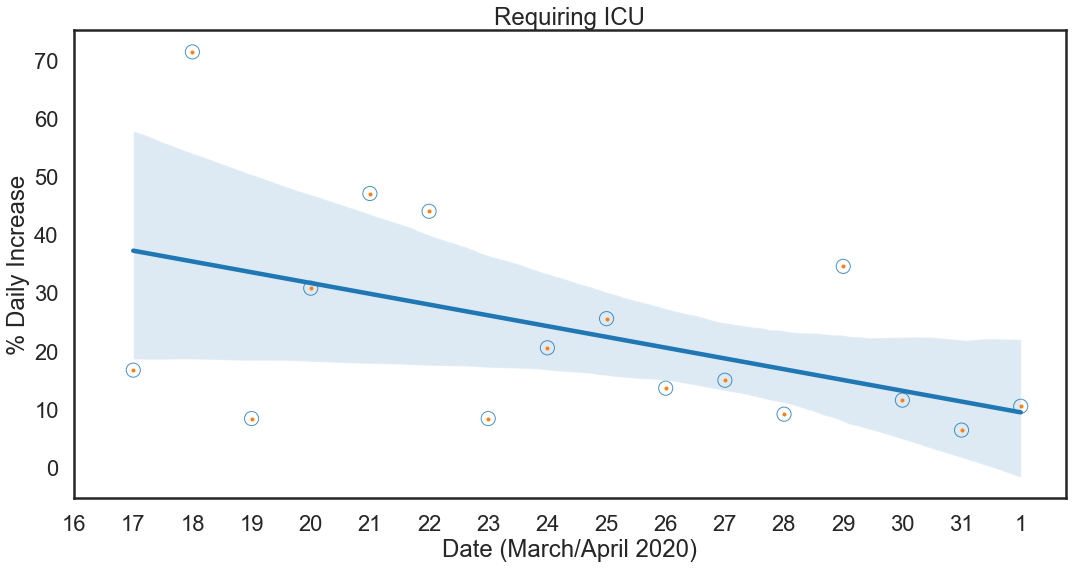

In [71]:
fig, ax = plt.subplots(figsize=figsize)

pct_change_icu = df['icu'].dropna().pct_change()*100

sns.regplot(
    pct_change_icu.index.values, pct_change_icu, ax=ax,
    truncate=True,
    scatter_kws=dict(marker='o', s=200, facecolors='none')
)

pct_change_icu.plot(ax=ax, marker='o', markersize=3, lw=0)


ax.set_title('Requiring ICU')
ax.set_xlabel('Date (March/April 2020)')
ax.set_ylabel('% Daily Increase')

ax.set_xticks(range(len(pct_change_icu)))
ax.set_xticklabels(df['day_of_month'])

fig.tight_layout()

In [72]:
fig.savefig('../graphs/pct_daily_increase_icu_for_ireland.png', format='png', dpi=dpi)

In [73]:
df.deaths

0       2
1       2
2       3
3       3
4       4
5       6
6       6
7       7
8       9
9      24
10     33
11     43
12     44
13     64
14     84
15     91
16    113
17    126
18    148
Name: deaths, dtype: int64

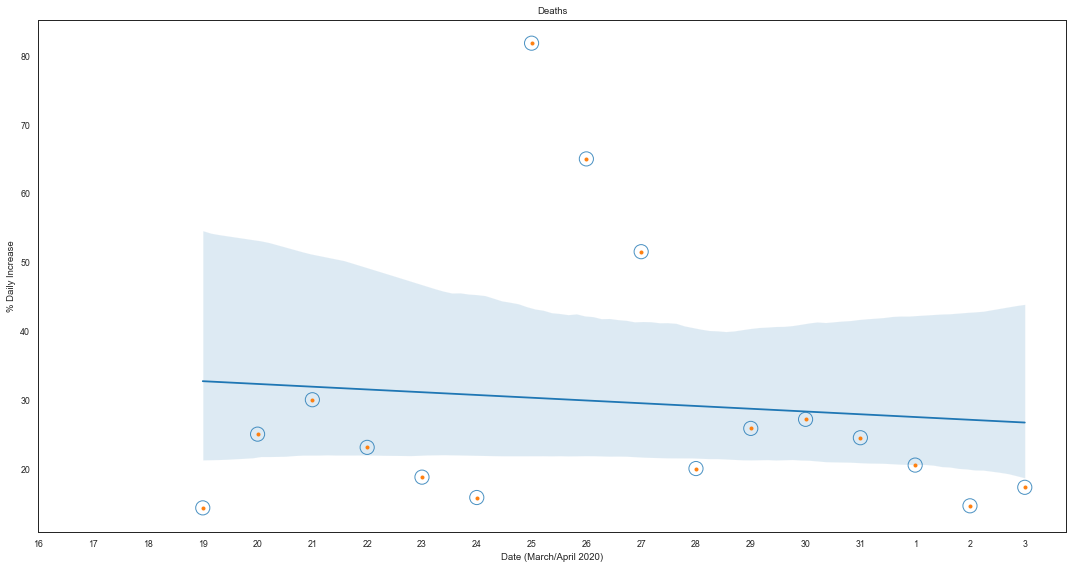

In [78]:
fig, ax = plt.subplots(figsize=figsize)

pct_change_deaths = df['deaths'].rolling(3).mean().pct_change()*100

sns.regplot(
    pct_change_deaths.index.values, pct_change_deaths, ax=ax,
    truncate=True,
    scatter_kws=dict(marker='o', s=200, facecolors='none')
)

pct_change_deaths.plot(ax=ax, marker='o', markersize=3, lw=0)


ax.set_title('Deaths')
ax.set_xlabel('Date (March/April 2020)')
ax.set_ylabel('% Daily Increase')

ax.set_xticks(range(len(pct_change_deaths)))
ax.set_xticklabels(df['day_of_month'])

fig.tight_layout()

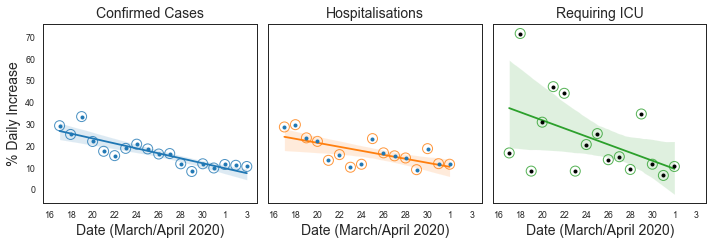

In [79]:
sns.set_context('paper')

fig, (ax, bx, cx) = plt.subplots(figsize=(10, 3.5), ncols=3, sharex=True, sharey=True)
s=100

pct_change_cases = df['cases'].dropna().pct_change()*100

sns.regplot(
    pct_change_cases.index.values, pct_change_cases, ax=ax,
    truncate=True,
    scatter_kws=dict(marker='o', s=s, facecolors='none')
)

pct_change_cases.plot(ax=ax, marker='o', markersize=3, lw=0)


pct_change_hospital = df['hospitalise'].dropna().pct_change()*100

sns.regplot(
    pct_change_hospital.index.values, pct_change_hospital, ax=bx,
    truncate=True,
    scatter_kws=dict(marker='o', s=s, facecolors='none')
)

pct_change_hospital.plot(ax=bx, marker='o', markersize=3, lw=0)



pct_change_icu = df['icu'].dropna().pct_change()*100

sns.regplot(
    pct_change_icu.index.values, pct_change_icu, ax=cx,
    truncate=True,
    scatter_kws=dict(marker='o', s=s, facecolors='none')
)

pct_change_icu.plot(ax=cx, marker='o', markersize=3, lw=0, c='k')

for xx in [ax, bx, cx]:
    xx.set_xticks(range(0, len(pct_change_cases), 2))
    xx.set_xticklabels([df.iloc[i]['day_of_month'] for i in range(len(pct_change_cases)) if i%2 is 0])
    xx.set_xlabel('Date (March/April 2020)', fontsize=14)
    xx.set_xlabel('Date (March/April 2020)', fontsize=14)
    xx.set_xlabel('Date (March/April 2020)', fontsize=14)

ax.set_ylabel('% Daily Increase', fontsize=14)

ax.set_title('Confirmed Cases', fontsize=14)
bx.set_title('Hospitalisations', fontsize=14)
cx.set_title('Requiring ICU', fontsize=14)

fig.tight_layout()

In [76]:
df

,date,cases,hospitalise,icu,deaths,cfr,healthcare,clusters,median_age,male,...,hospitalised_35_to_44,hospitalised_45_to_54,hospitalised_55_to_64,hospitalised_65+,hospitalised_unknown,community_transmission,confirmed_case_transmission,travel_transmission,unknown_transmission,day_of_month
0,2020-03-16,271,84.0,6.0,2,2.0,59.0,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,84.0,60.00,45.00,113.00,53.00,16
1,2020-03-17,350,108.0,7.0,2,NaN,84.0,26.0,43.0,NaN,...,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN,17
2,2020-03-18,438,140.0,12.0,3,NaN,114.0,27.0,44.0,241.0,...,15.0,11.0,23.0,31.0,32.0,40.00,21.00,39.00,96.00,18
3,2020-03-19,584,173.0,13.0,3,0.5,147.0,29.0,44.0,257.0,...,18.0,28.0,31.0,60.0,0.0,179.00,97.00,148.00,160.00,19
4,2020-03-20,712,211.0,17.0,4,0.6,169.0,35.0,44.0,393.0,...,22.0,40.0,34.0,71.0,0.0,0.44,0.23,0.33,258.00,20
5,2020-03-21,836,239.0,25.0,6,0.7,208.0,37.0,44.0,460.0,...,26.0,42.0,37.0,85.0,0.0,0.43,0.24,0.33,NaN,21
6,2020-03-22,965,277.0,36.0,6,0.6,247.0,44.0,45.0,534.0,...,26.0,52.0,43.0,101.0,0.0,0.45,0.24,0.31,NaN,22
7,2020-03-23,1146,305.0,39.0,7,0.6,283.0,63.0,45.0,624.0,...,27.0,57.0,50.0,114.0,0.0,0.29,0.15,0.18,0.38,23
8,2020-03-24,1383,340.0,47.0,9,0.9,321.0,66.0,46.0,753.0,...,29.0,64.0,56.0,133.0,0.0,0.28,0.13,0.16,0.42,24
9,2020-03-25,1639,419.0,59.0,24,1.3,375.0,79.0,46.0,879.0,...,40.0,70.0,71.0,169.0,1.0,307.00,3.00,0.15,0.55,25


In [77]:
df['hospitalise']

0       84.0
1      108.0
2      140.0
3      173.0
4      211.0
5      239.0
6      277.0
7      305.0
8      340.0
9      419.0
10     489.0
11     564.0
12     645.0
13     703.0
14     834.0
15     932.0
16    1039.0
17       NaN
18       NaN
Name: hospitalise, dtype: float64